In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing  import  scale
from sklearn.decomposition  import PCA
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [3]:
csv0= pd.read_csv("0.csv")
csv1= pd.read_csv("1.csv")
csv2= pd.read_csv("2.csv")
csv3= pd.read_csv("3.csv")

In [4]:

allFiles=['0.csv', '1.csv', '2.csv','3.csv']
list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
data = pd.concat(list)


In [5]:
data.info

<bound method DataFrame.info of         0    1    2    3     4     5      6     7     8    9   ...    55  \
0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0   
1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0   
2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   
3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0   
4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0   
...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...   ...   
2917  -3.0 -1.0 -1.0 -1.0 -28.0  20.0    5.0   0.0  -5.0  0.0  ...  -3.0   
2918 -13.0 -5.0 -4.0 -3.0  -4.0 -24.0  -10.0  -8.0  20.0  9.0  ...   6.0   
2919  -1.0 -3.0 -1.0  1.0  30.0  38.0   -1.0  36.0 -10.0  1.0  ...  14.0   
2920   1.0  4.0  4.0  5.0   9.0 -10.0    4.0   1.0  -2.0 -1.0  ... -16.0   
2921  -2.0  4.0  2.0 -4.0  12.0   3.0   -2.0   9.0  -8.0 -2.0  ...   2.0   

        56   57   58    59    60    61     62    63  64

In [6]:
data.isnull().sum().head


<bound method NDFrame.head of 0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64>

In [7]:
order= data[64].unique()
print(order)


[0 1 2 3]


In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [9]:
y = data[64]
X= data.drop(columns=64)

In [10]:
data[64].value_counts().sort_values(ascending=False)

2    2943
3    2922
0    2910
1    2903
Name: 64, dtype: int64

In [11]:
X.head

<bound method NDFrame.head of         0    1    2    3     4     5      6     7     8    9   ...     54  \
0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ...   21.0   
1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -105.0   
2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -128.0   
3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ...  -54.0   
4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...   60.0   
...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...    ...   
2917  -3.0 -1.0 -1.0 -1.0 -28.0  20.0    5.0   0.0  -5.0  0.0  ...   -3.0   
2918 -13.0 -5.0 -4.0 -3.0  -4.0 -24.0  -10.0  -8.0  20.0  9.0  ...    5.0   
2919  -1.0 -3.0 -1.0  1.0  30.0  38.0   -1.0  36.0 -10.0  1.0  ...   12.0   
2920   1.0  4.0  4.0  5.0   9.0 -10.0    4.0   1.0  -2.0 -1.0  ...   -2.0   
2921  -2.0  4.0  2.0 -4.0  12.0   3.0   -2.0   9.0  -8.0 -2.0  ...  -10.0   

        55    56   57   58    59    60    61 

In [12]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-1.622452,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,25.293001,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,3.000000,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,127.000000,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled_train =pd.DataFrame(X_scaled_train)
X_scaled_test=pd.DataFrame(X_scaled_test)

In [15]:
X_scaled_test.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.897962,0.223606,2.356874,-0.158795,0.349809,-0.015352,2.128207,-0.413754,0.313513,-0.624990,...,-1.480377,-0.196189,0.214258,-0.185965,0.566839,-0.430394,1.484974,0.090064,2.208949,0.618095
1,0.026488,-0.374961,-1.253112,-0.556220,1.577761,0.448405,-0.070962,1.075626,0.368848,-0.027987,...,0.055997,-0.196189,3.193393,2.106044,2.575162,0.238175,0.061796,1.114511,0.298683,1.899496
2,-1.441756,-0.118432,0.952990,0.503581,-0.878143,-0.672341,-0.030977,-0.478510,0.866868,-0.113273,...,0.055997,-0.196189,-0.282265,0.153592,0.366007,0.238175,-0.621330,-0.579766,0.219089,0.489955
3,0.298385,-0.118432,0.150771,-0.026320,0.461441,1.298627,-0.030977,-0.219488,-0.239842,-0.198559,...,0.055997,-0.065461,-0.613280,-0.525522,-0.236491,-0.430394,-1.361383,-1.210194,0.020103,-0.342955
4,0.515903,-0.032923,-2.255886,-0.821171,-0.319983,-0.749634,-0.230902,-0.413754,0.756197,2.104165,...,0.016602,0.261359,0.324596,-3.411756,-0.236491,0.505602,0.346431,0.287073,0.219089,-0.150745


In [16]:
cov_matrix = X_scaled_train.cov()
eigen_vals, eigen_vecs =np.linalg.eigh(cov_matrix)
np.sum(eigen_vals)


64.00730843896312

In [ ]:
A = X_scaled_train.cov()
x = eigen_vecs[:, 0] # First eigenvector
LHS = np.dot(A, x) # Ax
print(LHS)

[-0.00071933 -0.00117752  0.00495437 -0.00958084  0.0111963  -0.00681954
  0.00117527  0.00129149 -0.00051435 -0.00161002  0.00965168 -0.01595066
  0.02074834 -0.01339627  0.00195487  0.0013108   0.00053154 -0.00184558
  0.01201653 -0.02024228  0.02896049 -0.01930371  0.00205734  0.00175303
  0.00042843 -0.00189969  0.01301459 -0.0214747   0.03104015 -0.02091013
  0.00225011  0.00144918  0.00082467 -0.00304437  0.01338423 -0.02178359
  0.03055792 -0.0214959   0.00311255  0.00147683  0.00170481 -0.00344283
  0.01287558 -0.01990288  0.02717143 -0.01865322  0.00176285  0.00090025
  0.00224643 -0.00370848  0.00940975 -0.01536319  0.01964771 -0.01506809
  0.00093975  0.00097418  0.00103895 -0.00270651  0.00552519 -0.00867789
  0.01036569 -0.00856539  0.00067139 -0.00021925]


In [ ]:
lambda_eig = eigen_vals[0] # First eigenvalue
x = eigen_vecs[:, 0] # First eigenvector
RHS = lambda_eig * x # λx
print(RHS)

[-0.00071933 -0.00117752  0.00495437 -0.00958084  0.0111963  -0.00681954
  0.00117527  0.00129149 -0.00051435 -0.00161002  0.00965168 -0.01595066
  0.02074834 -0.01339627  0.00195487  0.0013108   0.00053154 -0.00184558
  0.01201653 -0.02024228  0.02896049 -0.01930371  0.00205734  0.00175303
  0.00042843 -0.00189969  0.01301459 -0.0214747   0.03104015 -0.02091013
  0.00225011  0.00144918  0.00082467 -0.00304437  0.01338423 -0.02178359
  0.03055792 -0.0214959   0.00311255  0.00147683  0.00170481 -0.00344283
  0.01287558 -0.01990288  0.02717143 -0.01865322  0.00176285  0.00090025
  0.00224643 -0.00370848  0.00940975 -0.01536319  0.01964771 -0.01506809
  0.00093975  0.00097418  0.00103895 -0.00270651  0.00552519 -0.00867789
  0.01036569 -0.00856539  0.00067139 -0.00021925]


In [ ]:
explained_variance=[]

for i in sorted(eigen_vals,reverse=True):
  variance = (i / np.sum(eigen_vals))
  explained_variance.append(variance)

cumulative_variance_ratio = np.cumsum(explained_variance)*100
print(cumulative_variance_ratio)

[  4.70458409   9.05851929  13.01124542  16.91114022  20.66601573
  24.11699848  27.50135433  30.7106687   33.86599837  36.87929532
  39.78712524  42.46965224  45.08342903  47.65124562  50.15999691
  52.58691677  54.94842403  57.04380323  59.04692089  61.04374454
  62.97559477  64.837373    66.67903344  68.26566973  69.81758623
  71.33211173  72.74349853  74.10466444  75.43097003  76.65159236
  77.83110067  78.99758871  80.14028338  81.25562719  82.33970153
  83.40460512  84.42191333  85.41285184  86.37641944  87.33211569
  88.26160584  89.09448658  89.88205271  90.61091588  91.31954074
  92.0086025   92.68720904  93.35663384  93.98099591  94.5973542
  95.19775037  95.76188013  96.29341372  96.80876446  97.30090091
  97.7533043   98.14600186  98.50083692  98.84219798  99.14377836
  99.429229    99.65767636  99.84322373 100.        ]


In [ ]:
print(explained_variance)

[0.047045840868900575, 0.04353935201222255, 0.03952726132573601, 0.038998947946944876, 0.03754875514786483, 0.03450982750431003, 0.03384355853166483, 0.03209314365545552, 0.0315532966667674, 0.03013296958404461, 0.029078299182827613, 0.026825270020589445, 0.026137767889050735, 0.02567816584302076, 0.02508751295984726, 0.024269198595429805, 0.023615072576010455, 0.020953791964544076, 0.020031176619161, 0.019968236503696862, 0.01931850234868134, 0.018617782237923954, 0.01841660438951509, 0.015866362888087338, 0.015519164996488926, 0.015145255048816478, 0.014113867956005655, 0.013611659113954329, 0.013263055897155467, 0.012206223287504397, 0.011795083087986788, 0.01166488047421333, 0.011426946662708805, 0.01115343813489865, 0.010840743364865162, 0.01064903588829331, 0.010173082164622748, 0.009909385035477069, 0.009635676070379623, 0.009556962407438073, 0.009294901532381526, 0.008328807391888968, 0.007875661309277027, 0.007288631711811241, 0.0070862486286809405, 0.006890617590802156, 0.006

In [ ]:
explained_variance_ratio=[]
for i in range(64):
    e=explained_variance[i]/np.sum(explained_variance)
    explained_variance_ratio.append(e)
print(explained_variance_ratio)


[0.047045840868900575, 0.04353935201222255, 0.03952726132573601, 0.038998947946944876, 0.03754875514786483, 0.03450982750431003, 0.03384355853166483, 0.03209314365545552, 0.0315532966667674, 0.03013296958404461, 0.029078299182827613, 0.026825270020589445, 0.026137767889050735, 0.02567816584302076, 0.02508751295984726, 0.024269198595429805, 0.023615072576010455, 0.020953791964544076, 0.020031176619161, 0.019968236503696862, 0.01931850234868134, 0.018617782237923954, 0.01841660438951509, 0.015866362888087338, 0.015519164996488926, 0.015145255048816478, 0.014113867956005655, 0.013611659113954329, 0.013263055897155467, 0.012206223287504397, 0.011795083087986788, 0.01166488047421333, 0.011426946662708805, 0.01115343813489865, 0.010840743364865162, 0.01064903588829331, 0.010173082164622748, 0.009909385035477069, 0.009635676070379623, 0.009556962407438073, 0.009294901532381526, 0.008328807391888968, 0.007875661309277027, 0.007288631711811241, 0.0070862486286809405, 0.006890617590802156, 0.006

In [ ]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)

len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 91])

44

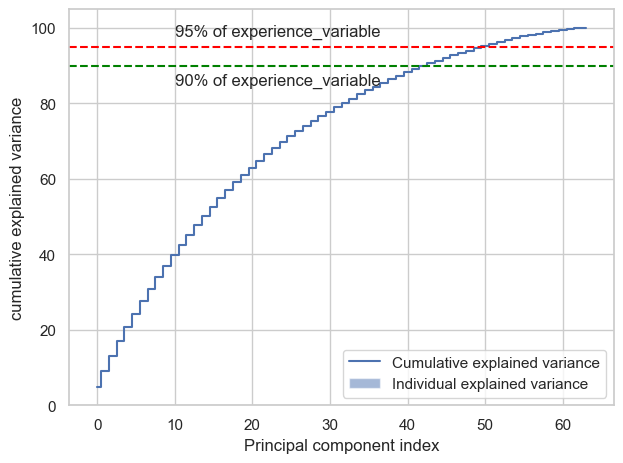

In [ ]:
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='red',linestyle='--')
plt.axhline(y=90,c='green',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.annotate('90% of experience_variable',
            xy=(10, 85),fontsize=12)
plt.tight_layout()
plt.show()

KPCA with RBF Kernel

In [17]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='rbf', n_components=64)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [41]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)*100
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio
display(kpca_df)

,cumulative explained variance,explained_variance_ratio
0,14.494873,14.494873
1,19.410752,4.915879
2,24.105188,4.694437
3,28.331324,4.226136
4,31.666812,3.335488
...,...,...
59,98.591645,0.385132
60,98.975189,0.383543
61,99.336178,0.360990
62,99.671726,0.335548


In [32]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)
len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 91])

64

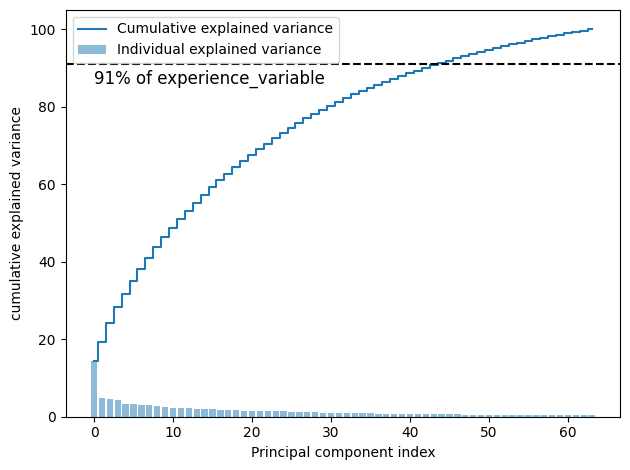

In [79]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=91,c='black',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('91% of experience_variable',
            xy=(0, 86),fontsize=12)
plt.tight_layout()
plt.show()

In [109]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 44 ,kernel= "rbf",n_jobs=-1)# extracts 2 features, specify the kernel as rbf
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)


Train accuracy: 0.4443936971911395 

Test accuracy: 0.4383561643835616 



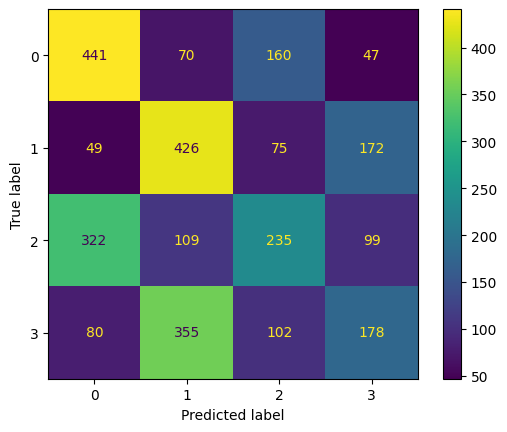

In [55]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.9462205983101165 

Test accuracy: 0.8873287671232877 



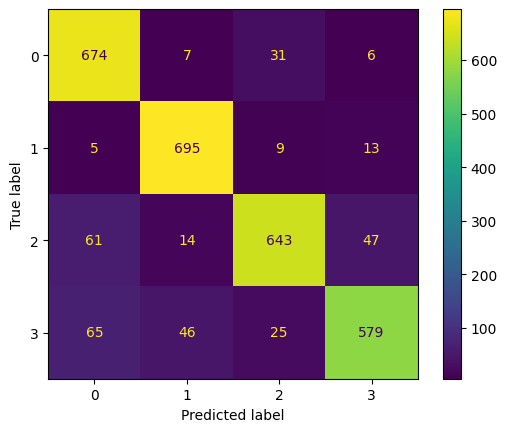

In [56]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [49]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,0.1,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train_kpca,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}
0.8917556569109888


Train accuracy: 0.992235670244348 

Test accuracy: 0.8993150684931507 



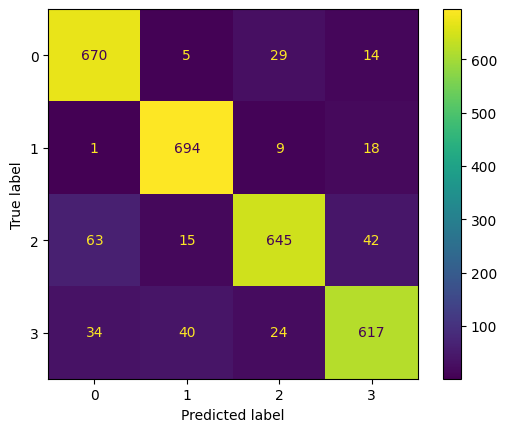

In [57]:
rbf_svm_better = SVC(kernel='rbf',C = 25, gamma = 'scale')
rbf_svm_better.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm_better.predict(X_test_kpca)
y_pred_train = rbf_svm_better.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.8619547841973053 

Test accuracy: 0.751027397260274 



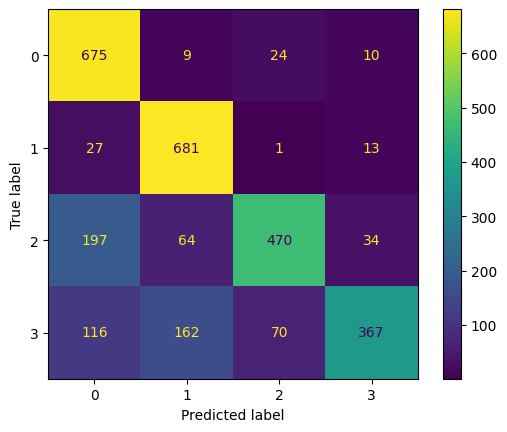

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_kpca, y_train)
y_pred_test = knn_model.predict(X_test_kpca)
y_pred_train = knn_model.predict(X_train_kpca)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.42943594427951587 

Test accuracy: 0.4476027397260274 



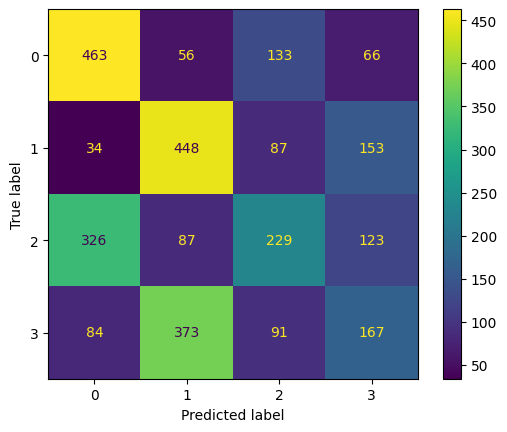

In [60]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train_kpca, y_train)
y_pred_test = ncc_model.predict(X_test_kpca)
y_pred_train = ncc_model.predict(X_train_kpca)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

KPCA+LDA with RBF Kernel

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)



In [81]:
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.91:
        break
        
# Return the number of components
print(n_components)


1


In [110]:
lda = LDA(n_components=1)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda = lda.transform(X_test_kpca)

Train accuracy: 0.4337748344370861 

Test accuracy: 0.4452054794520548 



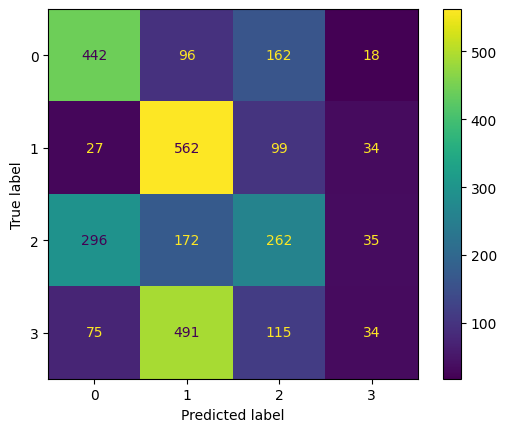

In [83]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.38661794930349397 

Test accuracy: 0.36198630136986304 



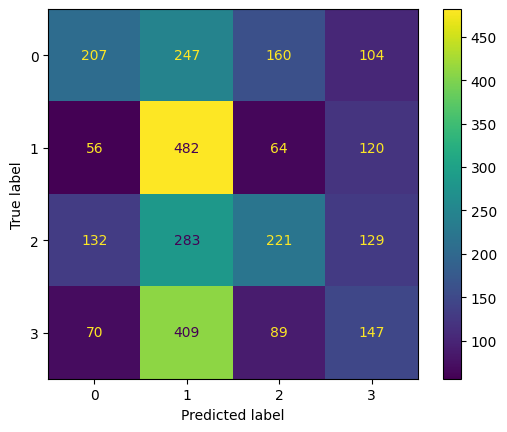

In [108]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [85]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,0.1,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train_kpca_lda,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
0.4456489963986659


Train accuracy: 0.4449646037908198 

Test accuracy: 0.4606164383561644 



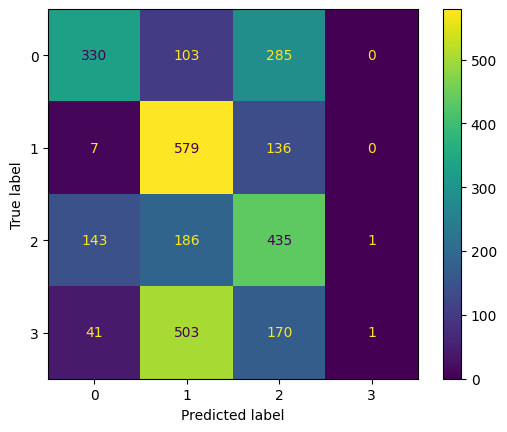

In [113]:
rbf_svm_better = SVC(kernel='rbf',C=20,gamma='scale')
rbf_svm_better.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm_better.predict(X_test_kpca_lda)
y_pred_train = rbf_svm_better.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.689540991093857 

Test accuracy: 0.3852739726027397 



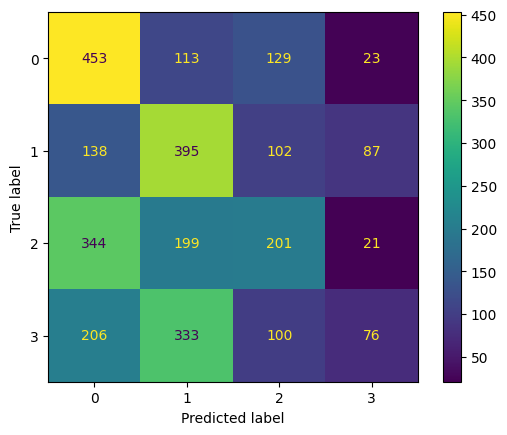

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_kpca_lda, y_train)
y_pred_test = knn_model.predict(X_test_kpca_lda)
y_pred_train = knn_model.predict(X_train_kpca_lda)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.42098652660424757 

Test accuracy: 0.44623287671232875 



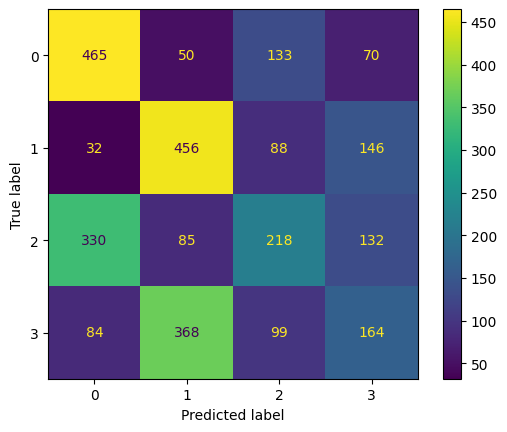

In [88]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train_kpca_lda, y_train)
y_pred_test = ncc_model.predict(X_test_kpca_lda)
y_pred_train = ncc_model.predict(X_train_kpca_lda)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

KPCA with Sigmoid Kernel

In [126]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='sigmoid', n_components=64)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [ ]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)*100
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio*100
display(kpca_df)


,cumulative explained variance,explained_variance_ratio
0,4.779009,4.779009
1,9.190418,4.411409
2,13.171135,3.980717
3,17.086425,3.915291
4,20.864494,3.778069
...,...,...
59,99.157272,0.279456
60,99.429987,0.272715
61,99.648334,0.218347
62,99.830501,0.182167


In [ ]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)

len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 91])

44

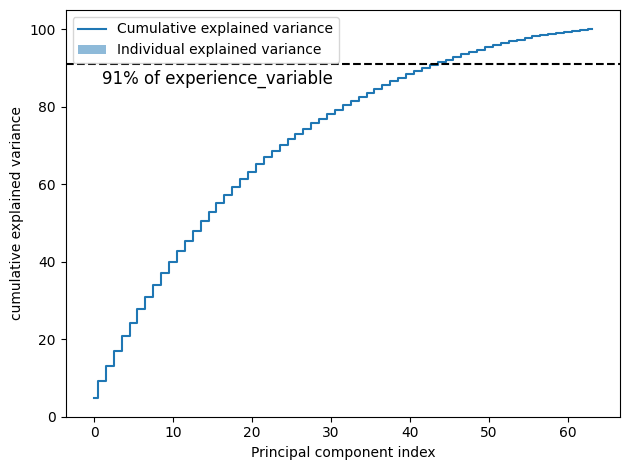

In [116]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')

plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=91,c='black',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('91% of experience_variable',
            xy=(1,86),fontsize=12)

plt.tight_layout()
plt.show()

In [118]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 44 ,kernel= "sigmoid",n_jobs=-1)# extracts 2 features, specify the kernel as rbf
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)

Train accuracy: 0.3034939483900434 

Test accuracy: 0.27294520547945206 



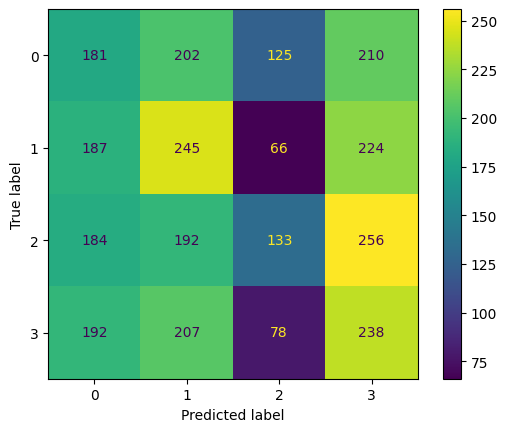

In [94]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.9359442795158712 

Test accuracy: 0.8900684931506849 



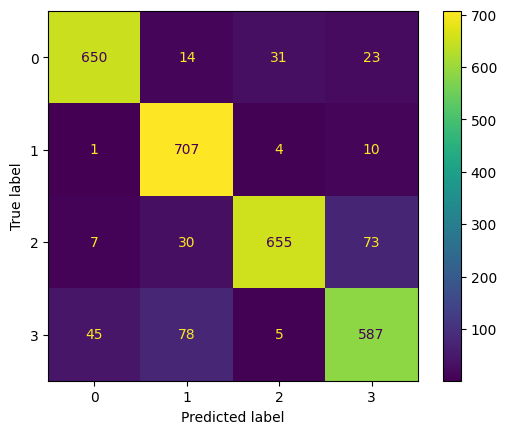

In [119]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [120]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,0.1,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=2,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train_kpca,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}
0.8941535691281434


Train accuracy: 0.9809317195706783 

Test accuracy: 0.9102739726027397 



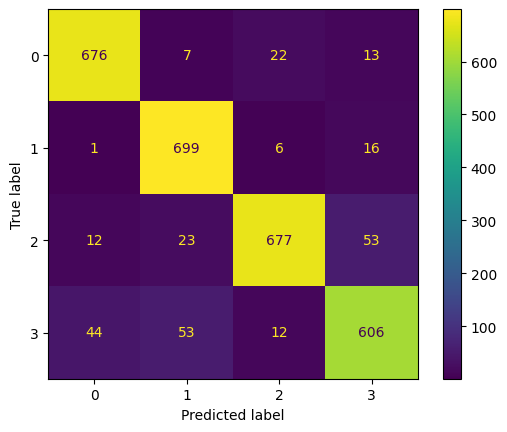

In [121]:
rbf_svm_better = SVC(kernel='rbf',C=6,gamma='scale')
rbf_svm_better.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm_better.predict(X_test_kpca)
y_pred_train = rbf_svm_better.predict(X_train_kpca)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.8622973281571135 

Test accuracy: 0.6482876712328767 



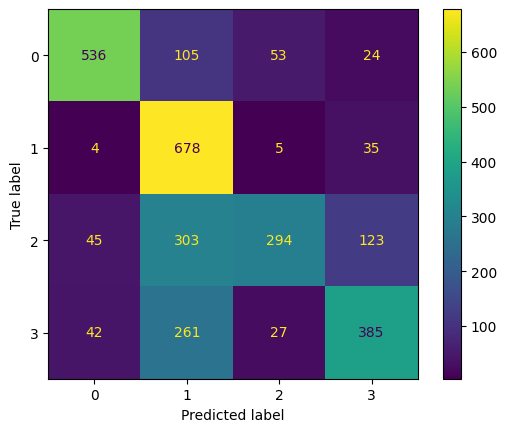

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_kpca, y_train)
y_pred_test = knn_model.predict(X_test_kpca)
y_pred_train = knn_model.predict(X_train_kpca)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.29595798127426354 

Test accuracy: 0.2660958904109589 



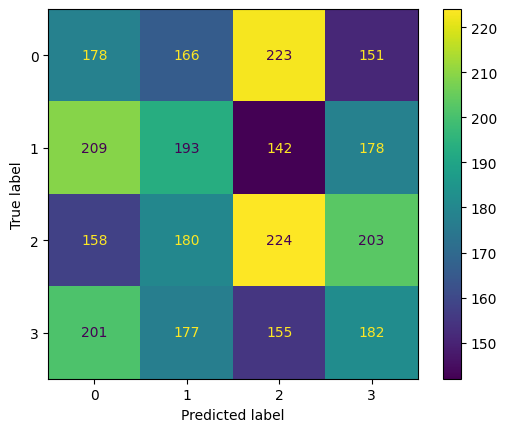

In [99]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train_kpca, y_train)
y_pred_test = ncc_model.predict(X_test_kpca)
y_pred_train = ncc_model.predict(X_train_kpca)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.95:
        break
        
# Return the number of components
print(n_components)


3


In [122]:
lda = LDA(n_components=3)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda=lda.transform(X_test_kpca)



Train accuracy: 0.3142269924640329 

Test accuracy: 0.27842465753424656 



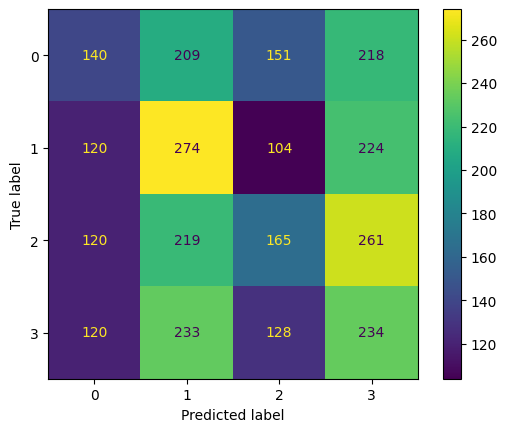

In [102]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.38661794930349397 

Test accuracy: 0.36198630136986304 



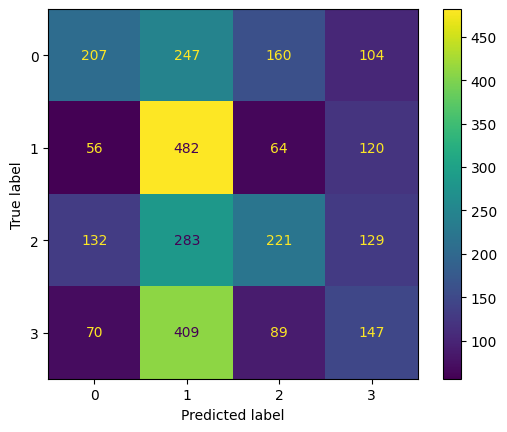

In [103]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [123]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,0.1,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train_kpca_lda,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
0.36777816459739904


Train accuracy: 0.37645581182918475 

Test accuracy: 0.3578767123287671 



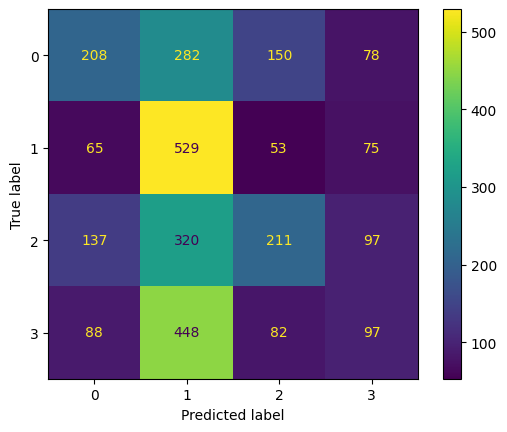

In [125]:
rbf_svm = SVC(kernel='rbf',C= 4, gamma= 0.1)
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.6493491664763644 

Test accuracy: 0.2839041095890411 



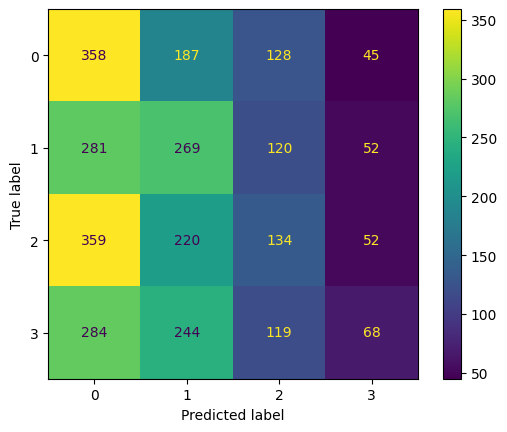

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_kpca_lda, y_train)
y_pred_test = knn_model.predict(X_test_kpca_lda)
y_pred_train = knn_model.predict(X_train_kpca_lda)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.3039506736697876 

Test accuracy: 0.2684931506849315 



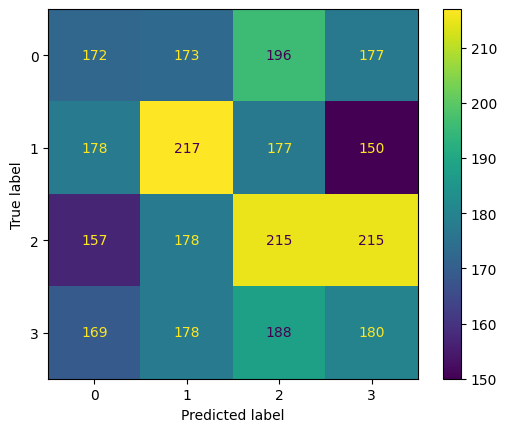

In [107]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train_kpca_lda, y_train)
y_pred_test = ncc_model.predict(X_test_kpca_lda)
y_pred_train = ncc_model.predict(X_train_kpca_lda)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()